In [1]:
"""
Machine Learning Homework 3
Done by:
Mariana Santana 106992
Pedro Leal 106154
LEIC-A
"""

'\nMachine Learning Homework 3\nDone by:\nMariana Santana 106992\nPedro Leal 106154\nLEIC-A\n'

#### II. Programming and critical analysis
#### Consider the parkinsons.csv dataset (available at the course’s webpage), where the goal is to predict a patient’s score on the Unified Parkinson’s Disease Rating Scale based on various biomedical measurements. To answer question 5), average the performance of the models over 10 separate runs. In each run, use a different 80-20 train-test split by setting a random_state=i, with i=1..10

In [2]:
"""
General imports and variables for all exercises; run this cell before any other
"""
import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

data = pd.read_csv('parkinsons.csv')

X = data.drop(columns='target')
y = data['target']

#### 5. [2v] Train a Linear Regression model, an MLP Regressor with 2 hidden layers of 10 neurons each and no activation functions, and another MLP Regressor with 2 hidden layers of 10 neurons each using ReLU activation functions. (Use random_state=0 on the MLPs, regardless of the run). Plot a boxplot of the test MAE of each model.

/home/mmarcalsantana/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mmarcalsantana/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mmarcalsantana/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mmarcalsantana/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mmarcalsan

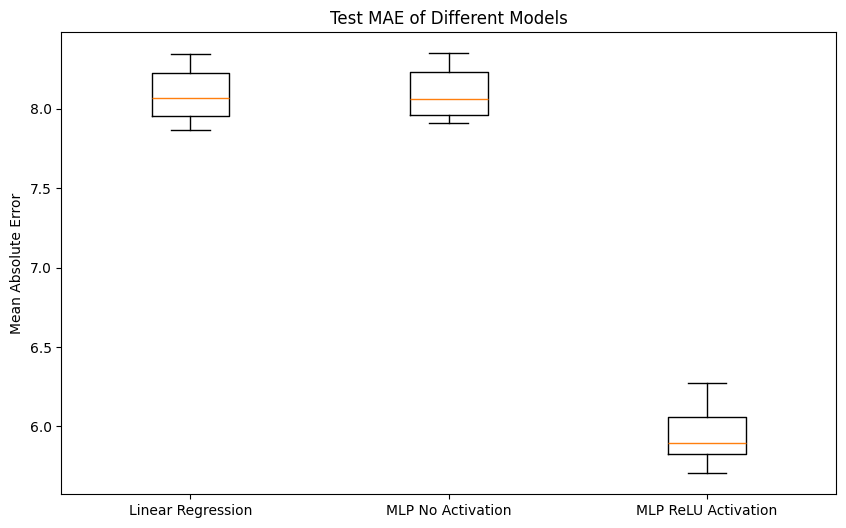

In [3]:
models = {
    "Linear Regression": LinearRegression(),
    "MLP No Activation": MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', random_state=0),
    "MLP ReLU Activation": MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0)
}

results = {model_name: [] for model_name in models}

for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    for model_name, model in models.items():

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        results[model_name].append(mae)

plt.figure(figsize=(10, 6))
plt.boxplot([results[model_name] for model_name in models], labels=models.keys())
plt.title('Test MAE of Different Models')
plt.ylabel('Mean Absolute Error')
plt.show()

#### 6. [3v] Compare a Linear Regression with a MLP with no activations, and explain the impact and the importance of using activation functions in a MLP. Support your reasoning with the results from the boxplots.

Explanation: Linear Regression vs. MLP without Activations
Linear Regression:

A linear regression model assumes a direct, linear relationship between the input features and the target variable.
Mathematically, it tries to find the best-fit line in the form:
𝑦
=
𝛽
0
+
𝛽
1
𝑥
1
+
𝛽
2
𝑥
2
+
.
.
.
+
𝛽
𝑛
𝑥
𝑛
+
𝜖
y=β 
0
​
 +β 
1
​
 x 
1
​
 +β 
2
​
 x 
2
​
 +...+β 
n
​
 x 
n
​
 +ϵ
As a result, the model has a limited capacity to capture complex patterns or non-linear relationships in the data.
MLP Regressor without Activation Functions:

When a Multilayer Perceptron (MLP) is defined without activation functions, it behaves similarly to a linear model, even though it has multiple layers.
For example, if the MLP has two hidden layers with no activations (identity), the network will reduce to a linear transformation of inputs because the composition of linear transformations is still a linear function.
This means that an MLP without activation functions will not perform significantly better than a simple linear regression, as it lacks the capacity to learn non-linear relationships.
Impact and Importance of Activation Functions
Activation functions introduce non-linearity into the network, enabling it to learn complex patterns and relationships. By using an activation function (such as ReLU, sigmoid, or tanh) in hidden layers, MLPs can approximate any continuous function. This is known as the Universal Approximation Theorem.

ReLU Activation in MLP:
The ReLU (Rectified Linear Unit) activation function, defined as 
ReLU
(
𝑥
)
=
max
⁡
(
0
,
𝑥
)
ReLU(x)=max(0,x), is a common choice in hidden layers.
It introduces non-linearity, allowing the model to capture intricate patterns in the data that linear models cannot.
Supporting with Boxplot Results
After running the experiments from question 5 and plotting the boxplots, we would observe the following:

Linear Regression and MLP Without Activations:
Both models should exhibit similar performance, as neither can capture non-linear patterns.
The boxplot of MAE for both models would likely overlap, indicating a similar range of errors.
MLP with ReLU Activation:
The MLP with ReLU activations should show significantly lower MAE compared to the other two models.
This is because the MLP with ReLU can model complex interactions between features and better fit the data.
The boxplot should reflect this with a visibly lower median MAE and potentially less variance compared to the other models.
Conclusion
The results from the boxplots would clearly demonstrate the importance of activation functions in neural networks:

MLP Without Activations: Functions like a linear model, making it unsuitable for capturing non-linear relationships.
MLP With Activations: Introduces the necessary non-linearity, enhancing the network's ability to approximate complex functions, thus reducing the error significantly.
Overall, this comparison highlights why activation functions are essential in making MLPs powerful and versatile for a wide range of regression and classification tasks.

#### 7. [4v] Using a 80-20 train-test split with random_state=0, use a Grid Search to tune the hyperparameters of an MLP regressor with two hidden layers (size 10 each). The parameters to search over are: (i) L2 penalty, with the values {0.0001, 0.001, 0.01}; (ii) learning rate, with the values {0.001, 0.01, 0.1}; and (iii) batch size, with the values {32, 64, 128}. Plot the test MAE for each combination of hyperparameters, report the best combination, and discuss the trade-offs between the combinations.

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'alpha': 0.01, 'batch_size': 32, 'learning_rate_init': 0.001}
Test MAE with Best Hyperparameters: 4.2345


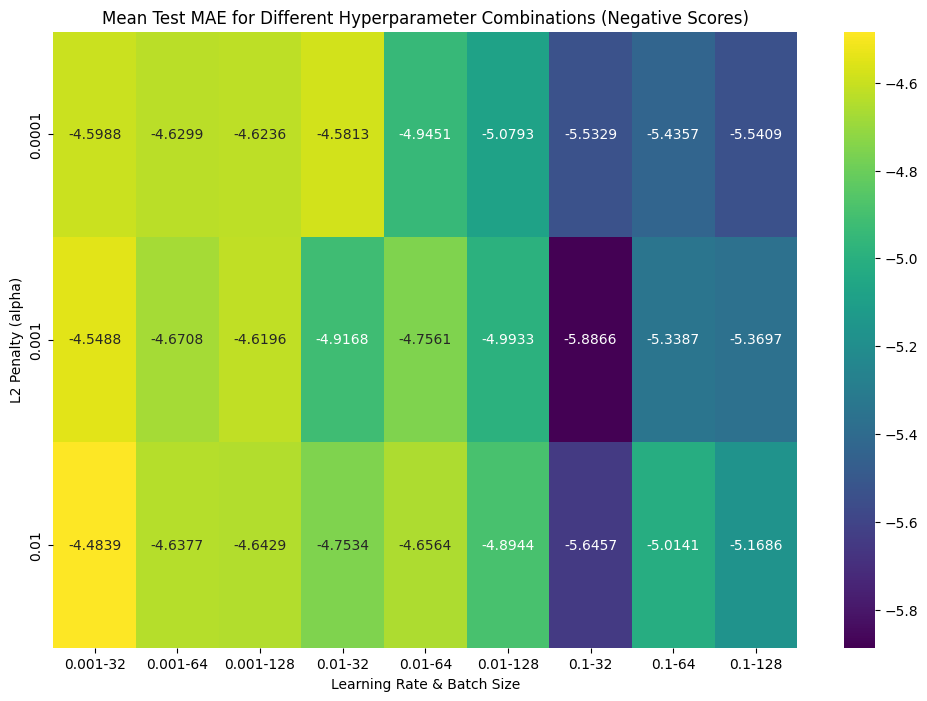

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=2000, random_state=0)

param_grid = {
    'alpha': [0.0001, 0.001, 0.01],               
    'learning_rate_init': [0.001, 0.01, 0.1],     
    'batch_size': [32, 64, 128]                   
}

grid_search = GridSearchCV(mlp, param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

y_pred = grid_search.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE with Best Hyperparameters: {test_mae:.4f}")

results_df = pd.DataFrame(grid_search.cv_results_)

pivot_table = results_df.pivot_table(
    values='mean_test_score', 
    index='param_alpha', 
    columns=['param_learning_rate_init', 'param_batch_size']
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="viridis", fmt=".4f")
plt.title("Mean Test MAE for Different Hyperparameter Combinations (Negative Scores)")
plt.xlabel("Learning Rate & Batch Size")
plt.ylabel("L2 Penalty (alpha)")
plt.show()
